In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from orphics import maps, stats, cosmology

import sys, os
sys.path.append("/global/homes/h/hongbo/tools/cmblensplus/wrap")
import curvedsky
from math import pi
import matplotlib as mpl
mpl.rcParams['font.size']=13

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size']=12

In [9]:
rec_ps = pd.read_csv('../output/recon_ps/CMB_S3_0_30_3000.csv')

In [10]:
rec_ps

,EB_inkap_x_inkap,EB_inkap_x_reckap,EB_rot_inkap_x_reckap,EB_reckap_x_reckap,EB_rot_reckap_x_reckap
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.308591e-08,6.581235e-08,6.095827e-08,6.581235e-08,6.095827e-08
3,4.136120e-07,1.552369e-07,1.572097e-07,1.552369e-07,1.572097e-07
4,3.166401e-06,4.692422e-07,4.469365e-07,4.692422e-07,4.469365e-07
...,...,...,...,...,...
2996,2.194505e+04,6.064005e-03,6.019124e-03,6.064005e-03,6.019124e-03
2997,2.139904e+04,6.839585e-03,6.852208e-03,6.839585e-03,6.852208e-03
2998,2.271577e+04,6.149277e-03,6.222468e-03,6.149277e-03,6.222468e-03
2999,2.181529e+04,6.038109e-03,6.076875e-03,6.038109e-03,6.076875e-03


In [11]:
lmax = 6000
ellmax = 3000
ells = np.arange(0, ellmax+1)
factor = ells*(ells+1)/(2*pi)
Tcmb  = 2.726e6 

In [12]:
clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
clpp = np.concatenate(([0,0],clpp))
clkk = clpp[ells]*ells**4/4

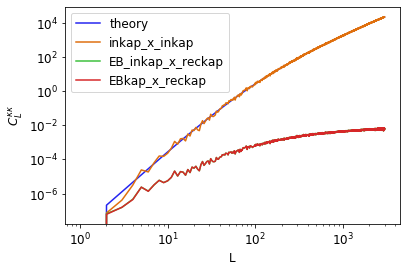

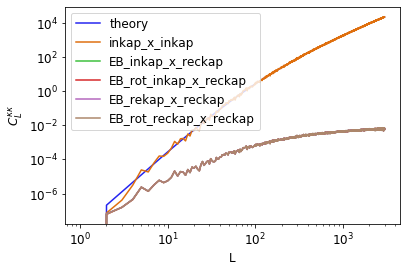

In [21]:
plt.plot(ells, clkk, label='theory')
plt.plot(ells, rec_ps['EB_inkap_x_inkap'], label='inkap_x_inkap')
plt.plot(ells, rec_ps['EB_inkap_x_reckap'], label='EB_inkap_x_reckap')
plt.plot(ells, rec_ps['EB_rot_inkap_x_reckap'], label='EB_rot_inkap_x_reckap')
plt.plot(ells, rec_ps['EB_reckap_x_reckap'], label='EB_rekap_x_reckap')
plt.plot(ells, rec_ps['EB_rot_reckap_x_reckap'], label='EB_rot_reckap_x_reckap')
# plt.plot(ls[:3001], abs(EB_reckap_x_reckap), label='EB_reckap_x_reckap')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')